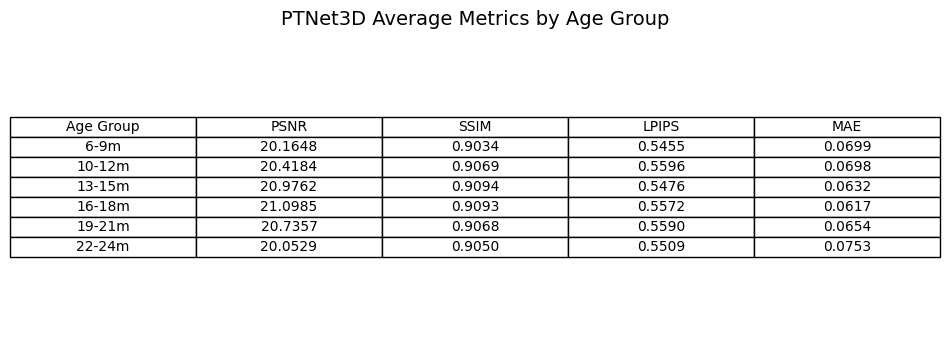

In [5]:
# Age,PSNR,SSIM,LPIPS,MAE,File,AgeGroup
# 6,15.276106708346852,0.8891864916868459,0.5608282430673674,0.14691642,test_MNBCP662338_6mo_T2.nii.gz,4-6m
# 22,21.87557562630238,0.91256351294629,0.5847070242468688,0.04735709,test_NCBCP530066_22mo_T2.nii.gz,19-24m
# labels=['0-3m', '4-6m', '7-9m', '10-12m','13-15m','16-18m','19-24m']
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Load the CSV data
data = pd.read_csv('./plots_PTNet3D/metrics_results.csv')
# Define age groups and their corresponding labels
age_groups = ['6-9m', '10-12m', '13-15m', '16-18m', '19-21m', '22-24m']
metrics = ['PSNR', 'SSIM', 'LPIPS', 'MAE']
# draw table
def draw_table(data, age_groups, metrics):
    # Prepare data for the table
    table_data = []
    for age_group in age_groups:
        row = [age_group]
        # group_data = data[data['AgeGroup'] == age_group]
        # use age range to filter data
        age_range = age_group.split('-')
        min_age = int(age_range[0].replace('m', ''))
        max_age = int(age_range[1].replace('m', ''))
        group_data = data[(data['Age'] >= min_age) & (data['Age'] <= max_age)]
        for metric in metrics:
            if not group_data.empty:
                mean_value = group_data[metric].mean()
                row.append(f"{mean_value:.4f}")
            else:
                row.append("N/A")
        table_data.append(row)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    table = ax.table(cellText=table_data,
                     colLabels=['Age Group'] + metrics,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.title('PTNet3D Average Metrics by Age Group', fontsize=14)
    plt.savefig('metrics_table.png', bbox_inches='tight')
    plt.show()

draw_table(data, age_groups, metrics)

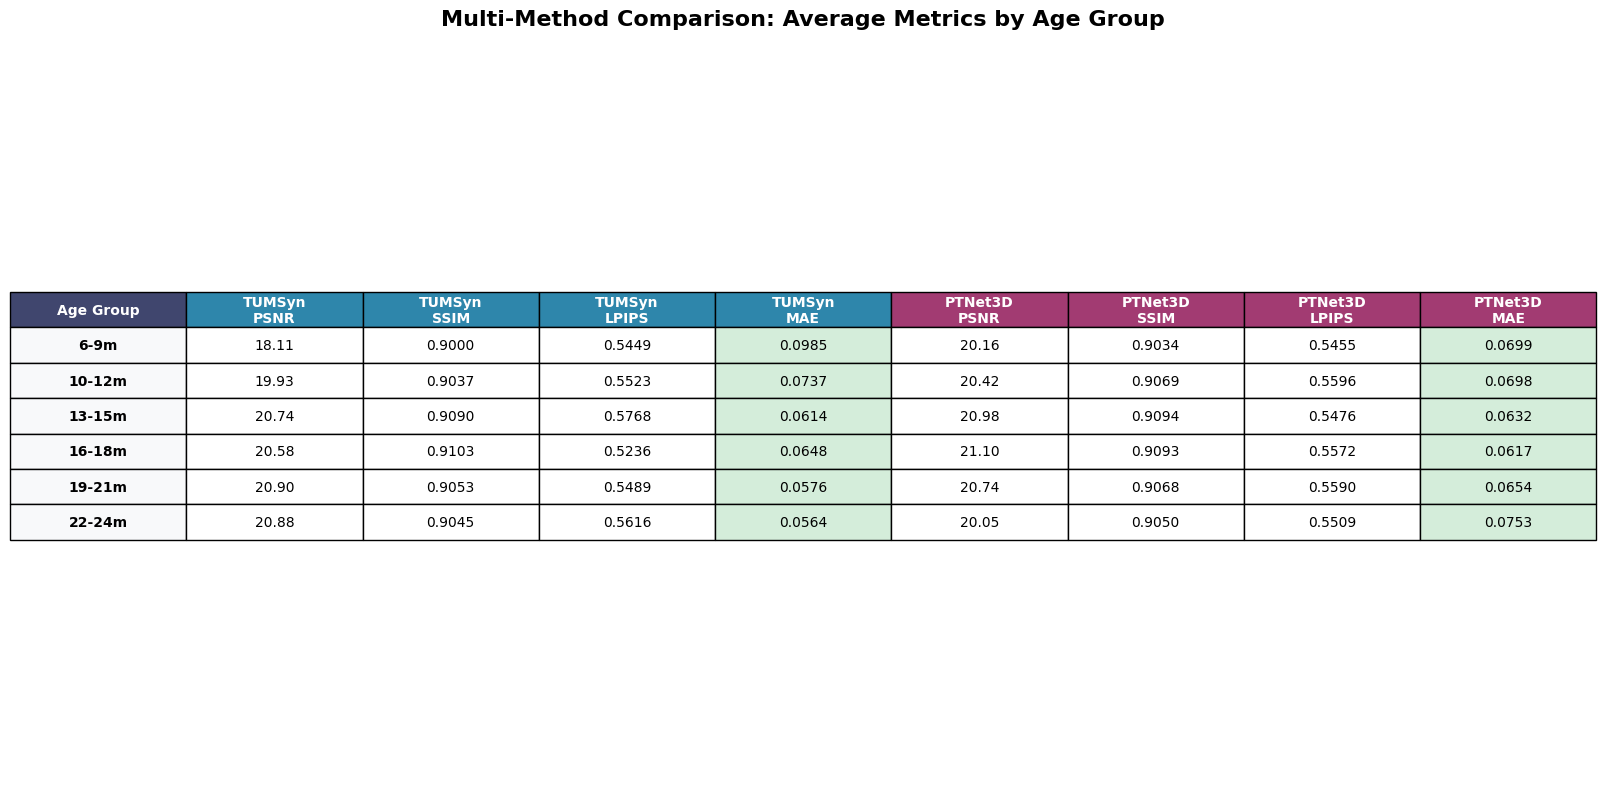

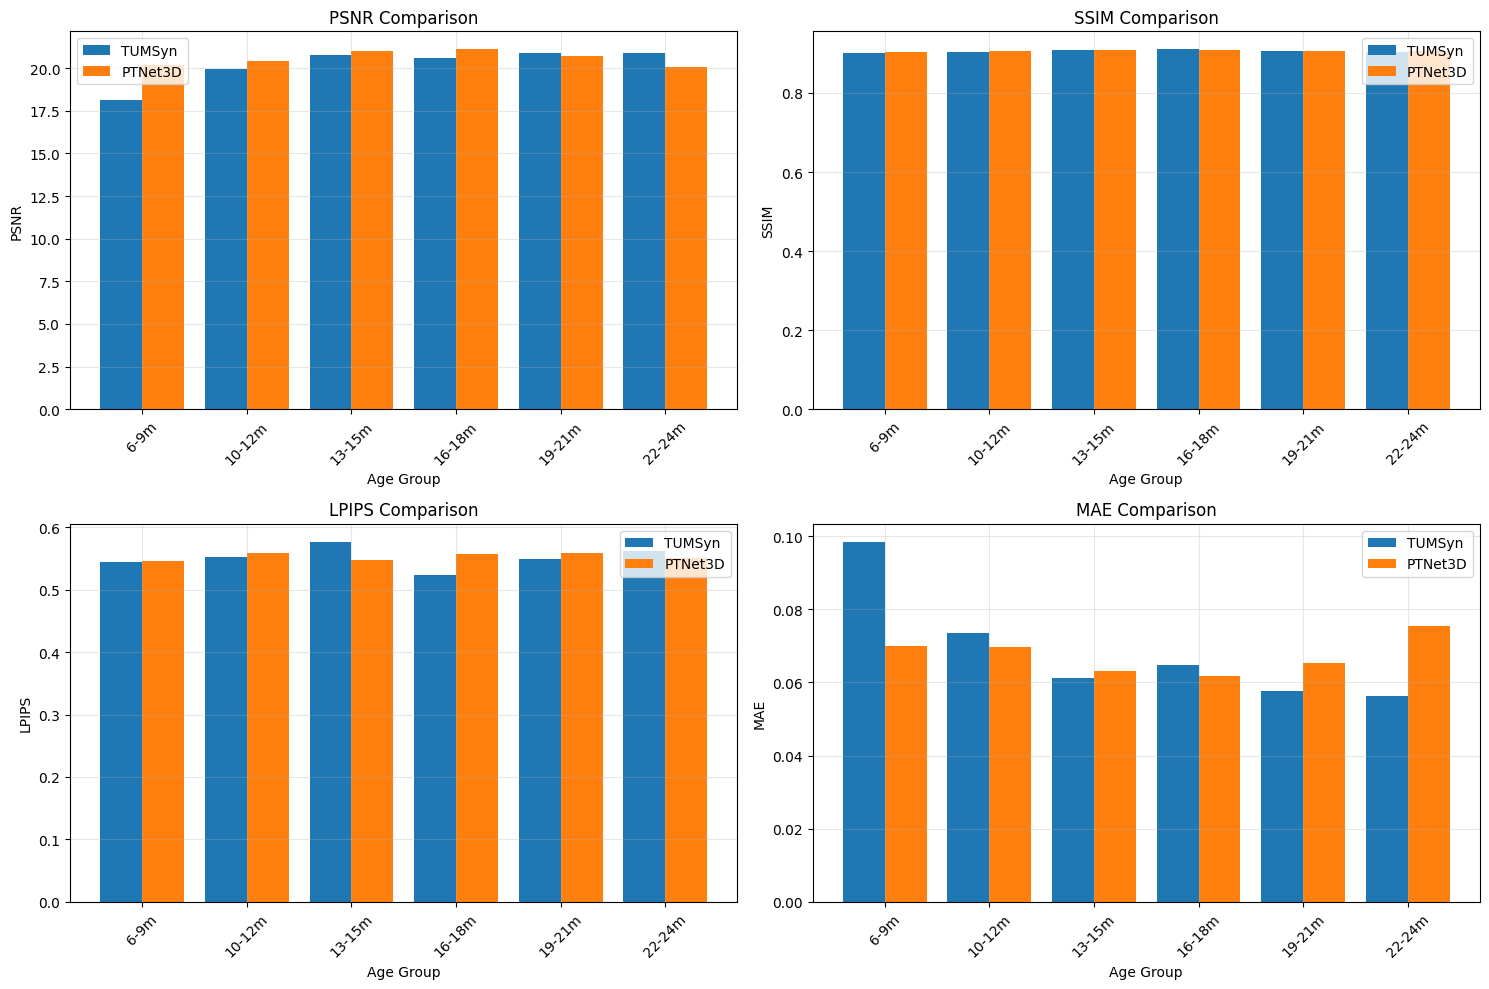

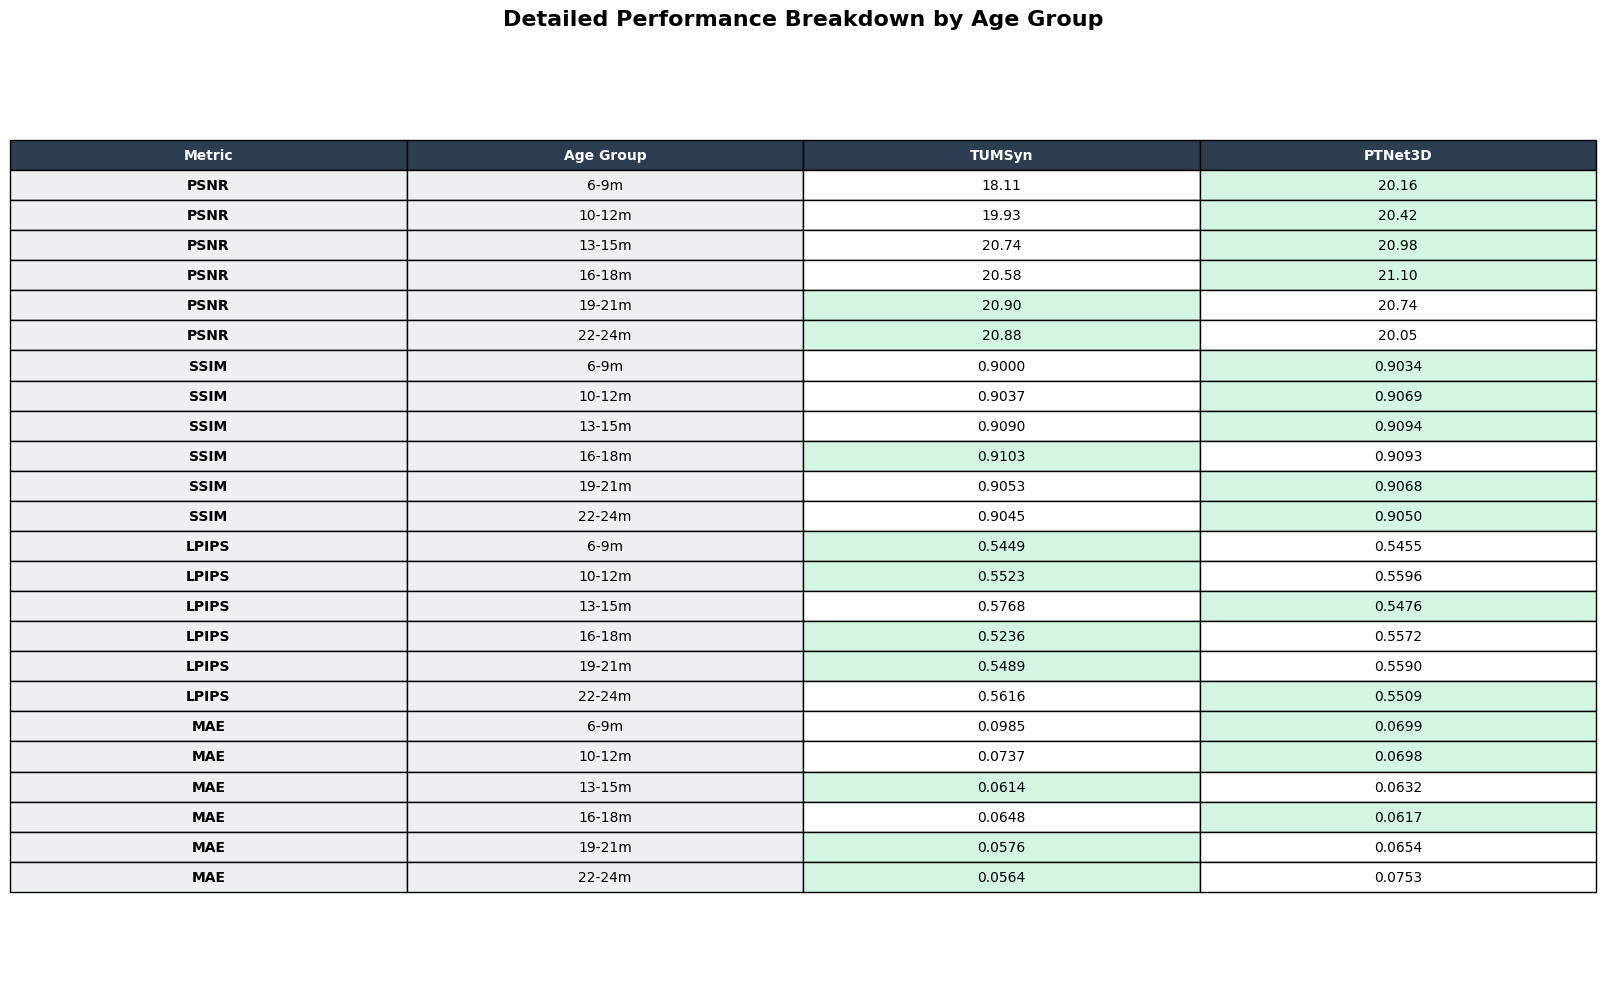

指标汇总统计:
PSNR: 均值=20.5449, 标准差=1.3410
SSIM: 均值=0.9067, 标准差=0.0113
LPIPS: 均值=0.5531, 标准差=0.0394
MAE: 均值=0.0678, 标准差=0.0189


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
import matplotlib.gridspec as gridspec

# 设置中文字体（如果需要显示中文）
# plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']
# plt.rcParams['axes.unicode_minus'] = False
def draw_composite_comparison_table(data_list, age_groups, metrics, method_names):
    """
    绘制复合对比表格，将多个方法的结果整合到单个表格中
    
    Args:
        data_list: DataFrame列表，包含各方法的指标数据
        age_groups: 年龄分组列表
        metrics: 指标列表
        method_names: 方法名称列表
    """
    # 创建图形
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # 准备复合表格数据
    table_data = []
    col_labels = ['Age Group']
    
    # 构建复合表头
    for method in method_names:
        for metric in metrics:
            col_labels.append(f'{method}\n{metric}')
    
    # 填充表格数据
    for age_group in age_groups:
        row = [age_group]
        age_range = age_group.split('-')
        min_age = int(age_range[0].replace('m', ''))
        max_age = int(age_range[1].replace('m', ''))
        
        for i, df in enumerate(data_list):
            group_data = df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]
            
            for metric in metrics:
                if not group_data.empty:
                    mean_value = group_data[metric].mean()
                    # 格式化显示
                    if metric in ['PSNR']:
                        row.append(f"{mean_value:.2f}")
                    elif metric in ['SSIM']:
                        row.append(f"{mean_value:.4f}")
                    elif metric in ['LPIPS', 'MAE']:
                        row.append(f"{mean_value:.4f}")
                    else:
                        row.append(f"{mean_value:.4f}")
                else:
                    row.append("N/A")
        
        table_data.append(row)
    
    # 创建表格
    table = ax.table(cellText=table_data,
                    colLabels=col_labels,
                    cellLoc='center',
                    loc='center')
    
    # 设置表格样式
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.8)
    
    # 设置表头样式
    header_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']  # 不同方法的颜色
    
    # 第一行表头（年龄组）
    cell = table[0, 0]
    cell.set_facecolor('#40466e')
    cell.set_text_props(color='white', weight='bold')
    
    # 方法名称行（跨列表头）
    col_index = 1
    for i, method in enumerate(method_names):
        for j in range(len(metrics)):
            cell = table[0, col_index]
            cell.set_facecolor(header_colors[i % len(header_colors)])
            cell.set_text_props(color='white', weight='bold')
            col_index += 1
    
    # 设置数据行样式和最佳值高亮
    for row in range(1, len(table_data) + 1):
        # 年龄组列
        cell = table[row, 0]
        cell.set_facecolor('#f8f9fa')
        cell.set_text_props(weight='bold')
        
        # 数据列
        col_index = 1
        for method_idx in range(len(method_names)):
            # 找出当前指标组的最佳值
            metric_values = []
            for metric_idx in range(len(metrics)):
                value_str = table_data[row-1][col_index]
                if value_str != "N/A":
                    metric_values.append(float(value_str))
                col_index += 1
            
            if metric_values:
                # 根据指标特性判断最佳值（PSNR/SSIM越高越好，LPIPS/MAE越低越好）
                best_value_idx = 0
                for metric_idx, metric in enumerate(metrics):
                    if metric in ['PSNR', 'SSIM']:
                        # 找最大值
                        if metric_values[metric_idx] == max(metric_values):
                            best_value_idx = metric_idx
                    else:  # LPIPS, MAE
                        # 找最小值
                        if metric_values[metric_idx] == min(metric_values):
                            best_value_idx = metric_idx
                
                # 高亮最佳值
                highlight_col = col_index - len(metrics) + best_value_idx
                cell = table[row, highlight_col]
                cell.set_facecolor('#d4edda')  # 浅绿色高亮
    
    # 添加标题
    plt.title('Multi-Method Comparison: Average Metrics by Age Group', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('composite_comparison_table.png', dpi=300, bbox_inches='tight')
    plt.show()


def create_comparison_chart(data_list, age_groups, metrics, method_names):
    """
    创建指标对比柱状图
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    for i, metric in enumerate(metrics):
        if i >= len(axes):
            break
            
        # 准备数据
        metric_data = []
        for j, df in enumerate(data_list):
            method_values = []
            for age_group in age_groups:
                age_range = age_group.split('-')
                min_age = int(age_range[0].replace('m', ''))
                max_age = int(age_range[1].replace('m', ''))
                group_data = df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]
                
                if not group_data.empty:
                    mean_value = group_data[metric].mean()
                    method_values.append(mean_value)
                else:
                    method_values.append(0)
            metric_data.append(method_values)
        
        # 绘制柱状图
        x = np.arange(len(age_groups))
        width = 0.8 / len(method_names)
        
        for j, values in enumerate(metric_data):
            axes[i].bar(x + j * width, values, width, 
                       label=method_names[j], color=colors[j % len(colors)])
        
        axes[i].set_xlabel('Age Group')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_xticks(x + width * (len(method_names) - 1) / 2)
        axes[i].set_xticklabels(age_groups, rotation=45)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('metrics_comparison_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

# 使用示例
if __name__ == "__main__":
    # 加载数据
    data_ptnet3d  = pd.read_csv('./plots_PTNet3D/metrics_results.csv')
    data_tumsyn = pd.read_csv("./TUMSyn_metrics_results.csv")
    
    # 定义年龄组和指标
    age_groups = ['6-9m', '10-12m', '13-15m', '16-18m', '19-21m', '22-24m']
    metrics = ['PSNR', 'SSIM', 'LPIPS', 'MAE']
    
    # 如果有多个方法的数据，可以这样处理
    # data1 = pd.read_csv('method1_metrics.csv')
    # data2 = pd.read_csv('method2_metrics.csv')
    data_list = [data_tumsyn, data_ptnet3d]
    method_names = ['TUMSyn', 'PTNet3D']
    
    # 单个方法的表格
    # draw_comparison_tables(data_ptnet3d, age_groups, metrics, ['PTNet3D'])
    
    # 多个方法的对比（如果有多个数据集）
    draw_composite_comparison_table(data_list, age_groups, metrics, method_names)
    create_comparison_chart(data_list, age_groups, metrics, method_names)
    
    # 生成汇总统计
    print("指标汇总统计:")
    for metric in metrics:
        print(f"{metric}: 均值={data[metric].mean():.4f}, 标准差={data[metric].std():.4f}")